# Python: Data visualization

We'll be using the `pandas` and `seaborn` packages to load and visualize data.

### Prerequisites

To complete this lesson, you will have to install a Python 3 distribution and the `pandas` and `seaboarn` packages. We recommend using Anaconda, because the packages we need are installed with Anaconda.
* Windows 10 instructions: https://go.wisc.edu/0xk009
* MacOS instructions: https://go.wisc.edu/79wnv8

If are using a different python distribution and do not have `seaborn` and `pandas` installed, uncomment and run the following code to install these packages via pip. 
* if you're not sure, skip down to **loading libraries** section. If the loading step fails, try installing

In [21]:
#pip install seaborn
#pip install pandas

### Loading libraries

To use the functions in `seaborn` and `pandas`, run the following code to load these libraries with aliases `sns` and `pd`. 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

If you get a message like:

`ModuleNotFoundError: No module named 'seaborn'`

go back and install the module.

## The Data

The data set that we’ll be working with contains data about various characteristics of small animals from an ecological study.
* each row is an inidvidual animal trapped by field scientists
* each column has data about the trapped animals  like species, sex and weight. 

### Loading the data

Use the `pandas` function `read_csv` to load the data. 

In [2]:
surveys = pd.read_csv('data/complete_surveys.csv')

In [3]:
surveys

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
0,845,5,6,1978,2,NL,M,32,204,Neotoma,albigula,Rodent,Control
1,1164,8,5,1978,2,NL,M,34,199,Neotoma,albigula,Rodent,Control
2,1261,9,4,1978,2,NL,M,32,197,Neotoma,albigula,Rodent,Control
3,1756,4,29,1979,2,NL,M,33,166,Neotoma,albigula,Rodent,Control
4,1818,5,30,1979,2,NL,M,32,184,Neotoma,albigula,Rodent,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30458,32477,8,25,2001,7,PB,M,28,32,Chaetodipus,baileyi,Rodent,Rodent Exclosure
30459,33103,11,17,2001,7,PB,M,28,41,Chaetodipus,baileyi,Rodent,Rodent Exclosure
30460,33305,12,15,2001,7,PB,M,29,44,Chaetodipus,baileyi,Rodent,Rodent Exclosure
30461,34524,7,13,2002,7,PB,M,25,16,Chaetodipus,baileyi,Rodent,Rodent Exclosure


## What is seaborn?

`seaborn` is a python data visualization library based on another library called `matplotlib`. `seaborn` integrates closely with `pandas` data structures, making visualizing data from pandas data frames easier.

Its plotting functions are divided into 3 general categories: 
* **distribution plots** for seeing the distribution of data in a variable
* **relational plots** for identifying relationships among variables
* **categorical plots** for visualizing categorical data

### Generalized plotting functions
Each category has a generalized (a.k.a. "figure-level")plotting function (`displot`, `replot`, and `catplot`) that determine the general type of plot you're making. These functions take the following input: 
* `kind` allows users to change the specific type of plot (ex: scatterplot vs. line plot)
* `data` specifies what data frame you're pulling data from
* `x`/`y` specifies what data you want to plot on each axis

### Specific plotting functions
Each category also has specific (a.k.a "axis-level") plotting functions for each "kind" of plot (instead of using the kind parameter). They use the same parameters as generalized functions, minus the `kind` parameter

Let's look at some examples of this syntax using `displot()` and related functions.

## Plotting distributions
Visualizing the distribution of data is important because many statistical tests assume that the data are normally distributed. The `displot()` function lets you easily see how your data are distributed.

### Histogram
 By default, the kind of plot is a histogram. All you need to specify is the data (`data = surveys`) and what variable you want to plot (`x = hindfoot_length`)

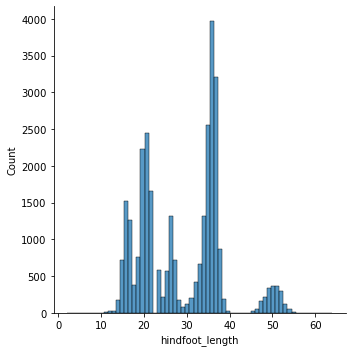

In [4]:
sns.displot(data = surveys,
            x = "hindfoot_length")

### Exercise: make a Kernel Density Estimation (KDE) plot
To get a slightly different view of the distribution, let's change the specific type of plot to kde (`kind = "kde"`). KDE plots show a curve representing "density" of the data at each particular value of `hindfoot_length`. It looks a lot like the histogram above, but smooth and the density value is in the rage of 0 to 1. Note that the highest peak of the graph is just over 0.08 on the density axis, meaning that only 8% of the data is represented in that part of the curve.

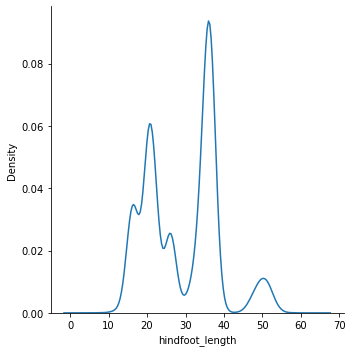

In [5]:
sns.displot(data = surveys,
            x = "hindfoot_length",  
            kind = 'kde')

This dataset is definitely not normally distributed. it looks like we have several overlapping curves. Let's see if it's due to the different species mixed in the data using `catplot()`.

## Plotting categorical data

It's often useful to get an idea of the distribution of data that is separated by categories, in this case, by species. The `catplot()` function.
* As with the `distplot()` function, the dataset you want to plot is specified with the `data` parameter
* However, you have to specify both the variable you want on the x-axis and the variable that you want on the y axis. One should be a categorical variable.
* The `kind` parameter can also be used to change the specific type of plot. The default plot type is a strip plot.

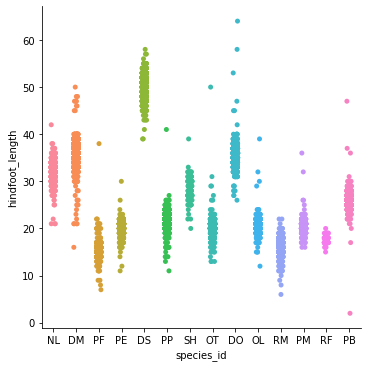

In [6]:
sns.catplot(data=surveys,
            x="species_id", 
            y="hindfoot_length")

### Boxplots

It does look like the distribution of the data does very based on species, but the data is likely overplotted, so we can't actually see where it's the densest. The most appropriate way to display this data is with a box plot using the `boxplot` function.
* The middle line is the median
* The ends of the box represent the 2nd and 3rd quartiles
* the ends of the "whiskers" represent the 1st and 3rd quartiles
* the individual points are generally considered outliers.

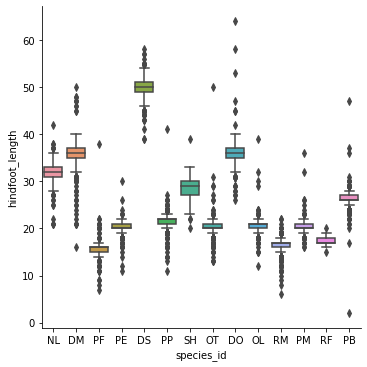

In [7]:
sns.catplot(data=surveys,
            x="species_id", 
            y="hindfoot_length", 
           kind = 'box')

Which is the same as

<AxesSubplot:xlabel='species_id', ylabel='hindfoot_length'>

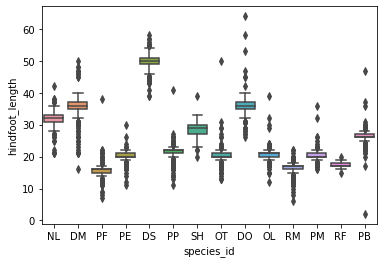

In [8]:
sns.boxplot(x = "species_id", 
     y = "hindfoot_length",
     data = surveys)

### Catplot exercise


Plot the same data as in the previous example, but as a Violin plot
Hint: see `kind = 'violin'.

What information does this give you about the data that a box plot does?

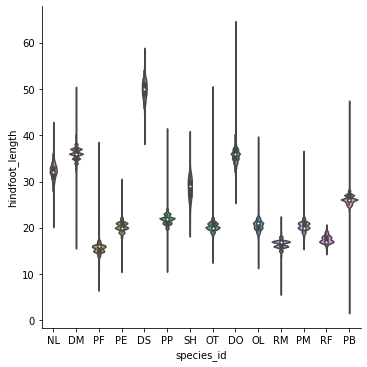

In [9]:
sns.catplot(data=surveys,
               x="species_id", 
               y="hindfoot_length", 
              kind = 'violin')

## Plotting relationships

We can also use `seaborn` to visualize the relationships between datasets. The `relplot()` function lets you see how two numeric variables relate to eachother using points or lines. 

### Scatterplot

To make a scatterplot, use `replot` and specify what dataset you're using (like with `distplot`) and what variables you want to plot on the `x` and `y` axes.

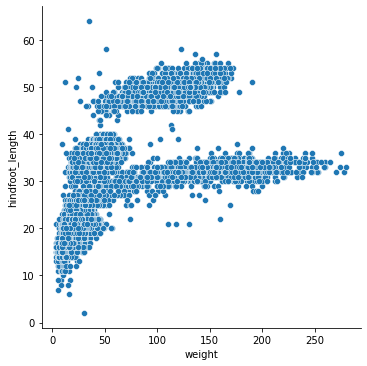

In [10]:
sns.relplot(data=surveys,
            x="weight", 
            y="hindfoot_length")

### Modifying your plots

`seaborn` has many ways that you can modify your plot to suit your needs.

#### Fix overplotting

In this plot, it's hard to see all of the data, because the points overlap so much. To get a better idea of where the points are the densest, we can use the `alpha` parameter in the `geom_point` function to make the points less opaque.

(`alpha = 0.1` means the points are 1/10 as opaque)

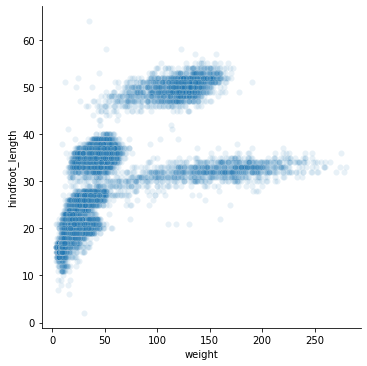

In [11]:
sns.relplot(data=surveys,
            x="weight", 
            y="hindfoot_length", 
            alpha = 0.1)

### Change the color

You can specify what color you want the points to be using the `color` parameter.

For a list of valid color names, see [here](https://python-graph-gallery.com/python-colors/)

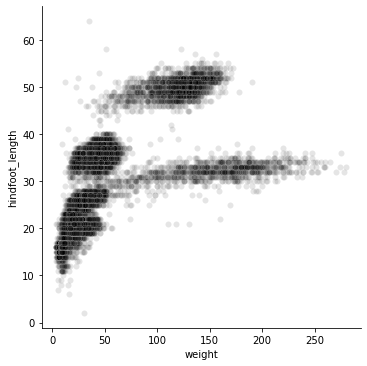

In [12]:
sns.relplot(data = surveys,
            x="weight", 
            y="hindfoot_length", 
            alpha = 0.1, 
            color = "black")

#### Color by species

You could also color the points by a category, like `species_id`. However, the `color` parameter only takes color names. We need to use the `hue` parameter to color by a value in the dataset.

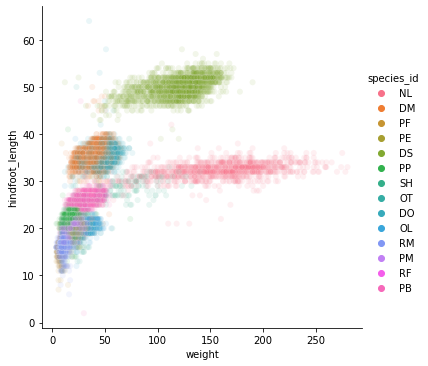

In [13]:
sns.relplot(data=surveys,
            x="weight", 
            y="hindfoot_length", 
            alpha = 0.1, 
            hue = "species_id")

### Scatterplot exercise

Add color to the data points according to the plot from which the sample was taken (plot_id).

Hint: Check the data type for `plot_id`. Why does this change how plotnine makes the graph?

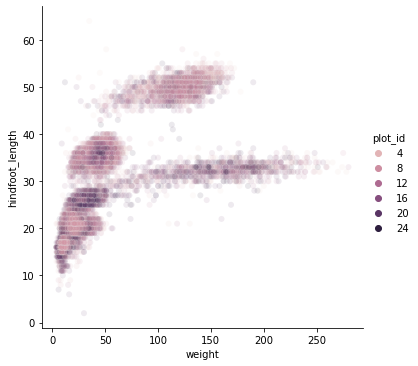

In [14]:
sns.relplot(x="weight", 
            y="hindfoot_length", 
            alpha = 0.1, 
            hue = "plot_id", 
            data=surveys)

### Building multi-plot grids

Sometimes, data is better represented by spliting it into multiple plots by a categorical variable. The `FacetGrid()` function allows you to do this in a uniform way that is based on your data. These plots are called called `conditional small multiples`. 

The first step is to create a FacetGrid object with your dataset and the categorical variable you'd like to split on. 

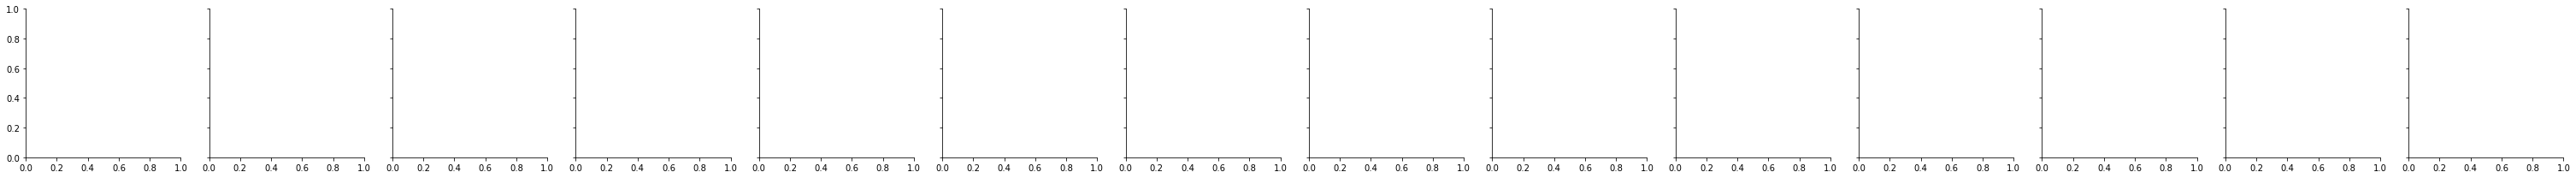

In [15]:
plot_grid = sns.FacetGrid(surveys, 
                          col = "species_id")

Next, use the `map` function to specify what you want each plot to look like. 
* the first parameter is the plotting function
* subsequent arguments are the parameters you would put in the plotting function

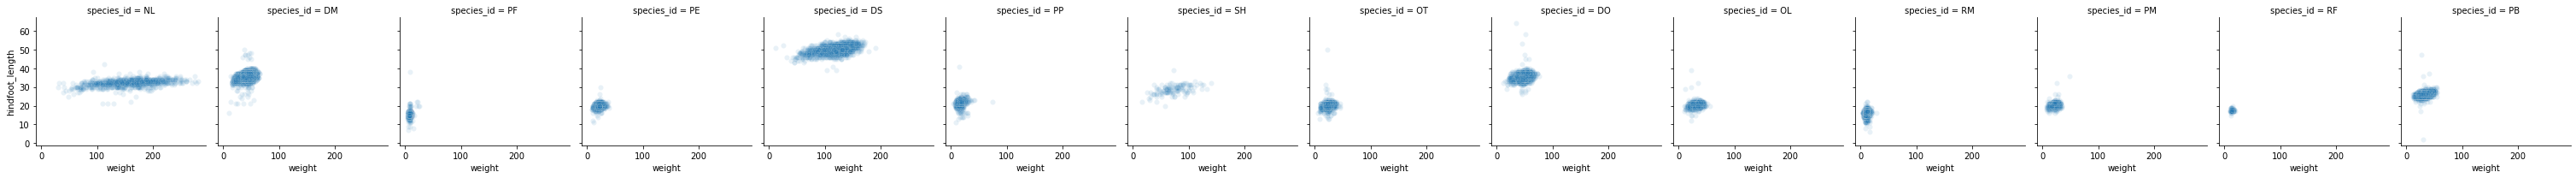

In [16]:
plot_grid = sns.FacetGrid(surveys, 
                          col = "species_id")
plot_grid.map(sns.scatterplot, 
              "weight", 
              "hindfoot_length", 
              alpha = 0.1)

These plots are pretty tiny, so let's specit how many plots per row er want:

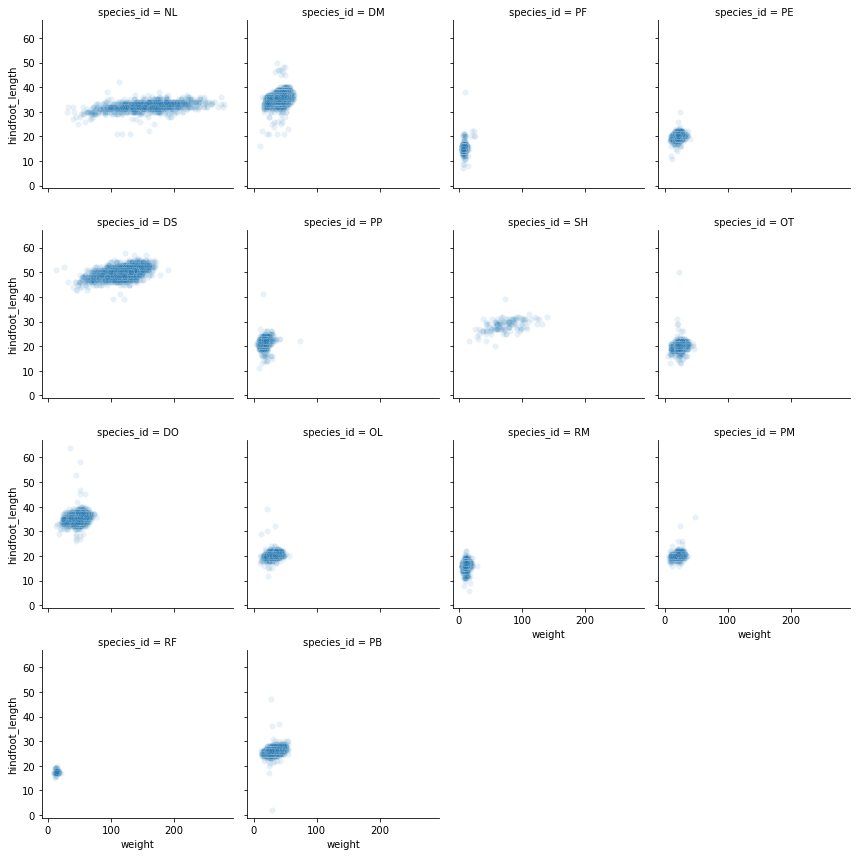

In [17]:
plot_grid = sns.FacetGrid(surveys, 
                          col = "species_id", 
                          col_wrap = 4)

plot_grid.map(sns.scatterplot, 
              "weight", 
              "hindfoot_length", 
              alpha = 0.1)

You can also specify both a `row` parameter and a `col` parameter, the row parameter or both:

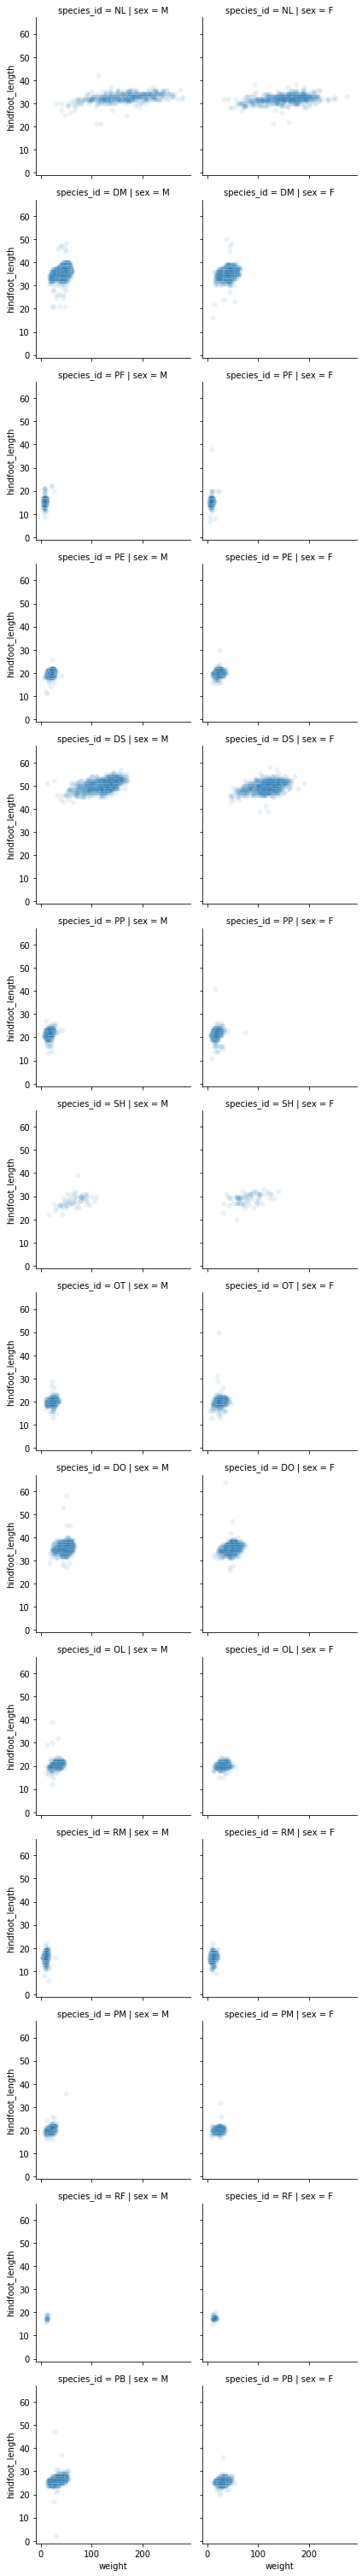

In [18]:
plot_grid = sns.FacetGrid(surveys, 
                          row = "species_id", 
                          col = "sex")

plot_grid.map(sns.scatterplot, 
              "weight", 
              "hindfoot_length",
              alpha = 0.1)

Any of the customizations that we used before can be used in a faceted plot series

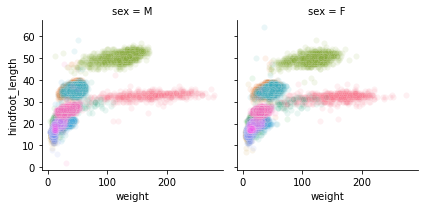

In [19]:
plot_grid = sns.FacetGrid(surveys, 
                          col = "sex", 
                          hue = "species_id")

plot_grid.map(sns.scatterplot, 
              "weight", "hindfoot_length", 
              alpha = 0.1)

### Creating publication quality plots

While seaborn look pretty good out of the box, they might not be suitable for publication because of the default colored backgrounds, font size, axis labels, etc.

We can use `themes` to alter these attributes and apply them to many plots for a uniform look.

#### Applying pre-made themes

For example, let's apply the default them (`darkgrid`) to our time series plot

<AxesSubplot:xlabel='weight', ylabel='hindfoot_length'>

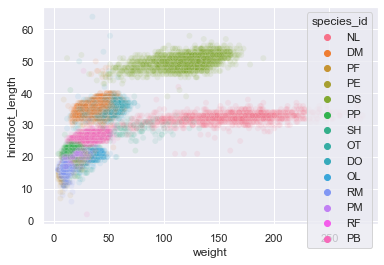

In [21]:
sns.set_theme()
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

<AxesSubplot:xlabel='weight', ylabel='hindfoot_length'>

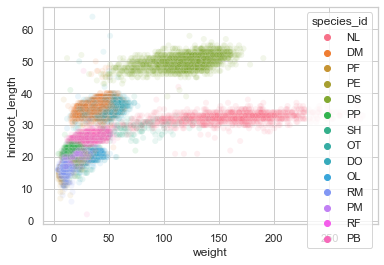

In [22]:
sns.set_style("whitegrid")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

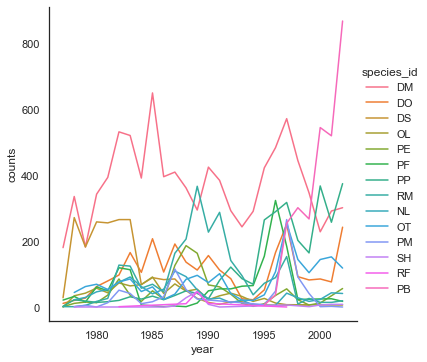

In [54]:
sns.set_style("white")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")


<AxesSubplot:xlabel='weight', ylabel='hindfoot_length'>

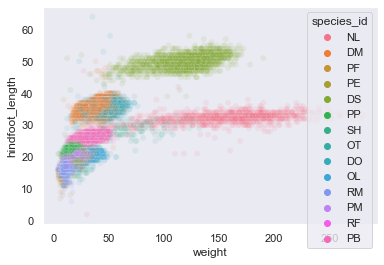

In [23]:
sns.set_style("dark")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

<AxesSubplot:xlabel='weight', ylabel='hindfoot_length'>

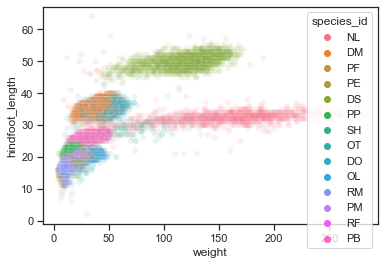

In [24]:
sns.set_style("ticks")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")


### Adding plot labels

We can also use the labs function to add custom labels to the plot.

Text(0.5, 1.0, 'Hindfoot length vs. weight')

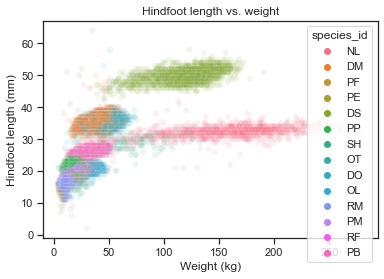

In [25]:
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)')
plt.ylabel('Hindfoot length (mm)')
plt.title('Hindfoot length vs. weight')

#### Applying pre-made styles

Seaborn also has a quick way to re-format your plots for different contexts: `set_style()`. You can format your plots for notebooks (default), papers, poster, or talks.

Text(0.5, 1.0, 'Observed Species in time')

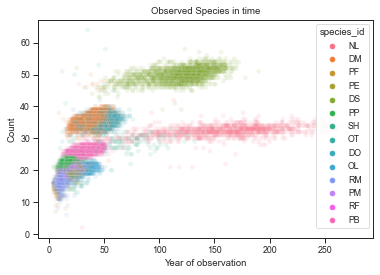

In [26]:
sns.set_style("ticks")
sns.set_context("paper")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)')
plt.ylabel('Hindfoot length (mm)')
plt.title('Hindfoot length vs. weight')

Text(0.5, 1.0, 'Hindfoot length vs. weight')

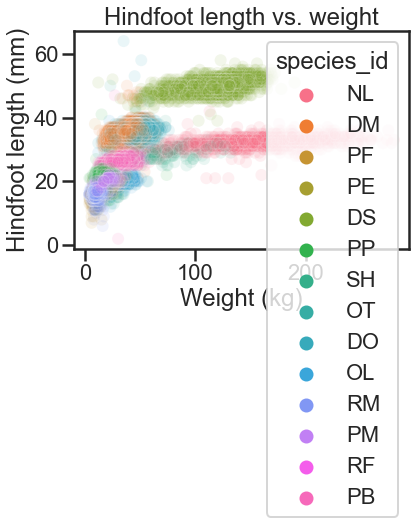

In [27]:
sns.set_style("ticks")
sns.set_context("poster")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)')
plt.ylabel('Hindfoot length (mm)')
plt.title('Hindfoot length vs. weight')

Text(0.5, 1.0, 'Hindfoot length vs. weight')

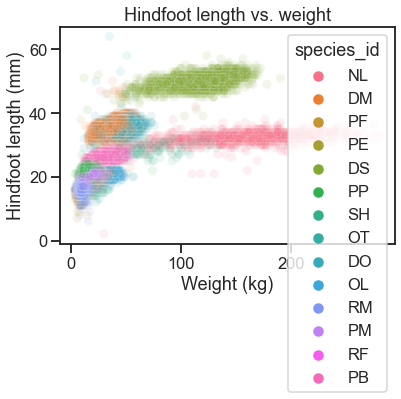

In [28]:
sns.set_style("ticks")
sns.set_context("talk")
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)')
plt.ylabel('Hindfoot length (mm)')
plt.title('Hindfoot length vs. weight')

You can also use the `font_scale` argument to scale all the fonts to be smaller or larger

Text(0.5, 1.0, 'Hindfoot length vs. weight')

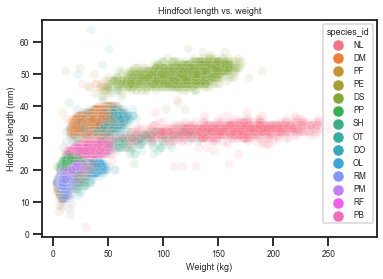

In [29]:
sns.set_style("ticks")
sns.set_context("talk", font_scale=0.5)
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)')
plt.ylabel('Hindfoot length (mm)')
plt.title('Hindfoot length vs. weight')

The RC parameter controls many of the other aspect of plot appearance. to see what the current settings are, we can use `sns.plotting_context()`


Text(0.5, 1.0, 'Hindfoot length vs. weight')

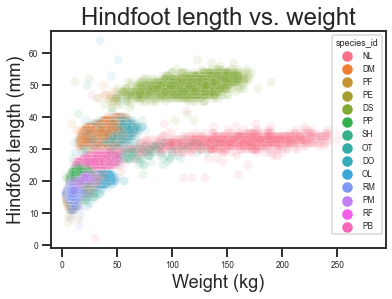

In [30]:
sns.set_style("ticks")
sns.set_context("talk", font_scale=0.5)
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)', size = 18)
plt.ylabel('Hindfoot length (mm)', size = 18)
plt.title('Hindfoot length vs. weight', size = 24)

In [68]:
sns.plotting_context()

{'font.size': 9.0,
 'axes.labelsize': 15.0,
 'axes.titlesize': 19.0,
 'xtick.labelsize': 8.25,
 'ytick.labelsize': 8.25,
 'legend.fontsize': 8.25,
 'axes.linewidth': 1.875,
 'grid.linewidth': 1.5,
 'lines.linewidth': 2.25,
 'lines.markersize': 9.0,
 'patch.linewidth': 1.5,
 'xtick.major.width': 1.875,
 'ytick.major.width': 1.875,
 'xtick.minor.width': 1.5,
 'ytick.minor.width': 1.5,
 'xtick.major.size': 9.0,
 'ytick.major.size': 9.0,
 'xtick.minor.size': 6.0,
 'ytick.minor.size': 6.0,
 'legend.title_fontsize': 30.0}

We can adjust the look of the plot by editing the values and setting the rc parameter to these values

Text(0.5, 1.0, 'Hindfoot length vs. weight')

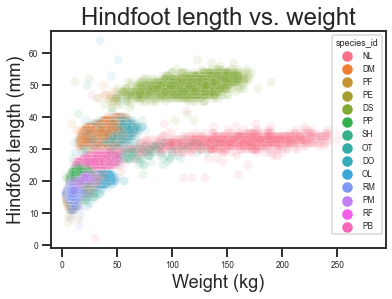

In [31]:
sns.set_style("ticks")
sns.set_context("talk", 
                font_scale=0.5, 
                rc = {'font.size': 12,
                     'xtick.labelsize': 12,
                      'ytick.labelsize': 12})


sns.set_style("ticks")
sns.set_context("talk", font_scale=0.5)
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)', size = 18)
plt.ylabel('Hindfoot length (mm)', size = 18)
plt.title('Hindfoot length vs. weight', size = 24)

### Saving plots to a file

You can also save these plots to a file on your computer 

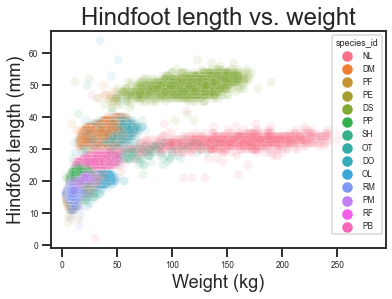

In [33]:
sns.set_style("ticks")
sns.set_context("talk", 
                font_scale=0.5, 
                rc = {'font.size': 12,
                     'xtick.labelsize': 12,
                      'ytick.labelsize': 12})


sns.set_style("ticks")
sns.set_context("talk", font_scale=0.5)
sns.scatterplot(data = surveys, 
                x = "weight", 
                y = "hindfoot_length", 
                alpha = 0.1, 
                hue = "species_id")

plt.xlabel('Weight (kg)', size = 18)
plt.ylabel('Hindfoot length (mm)', size = 18)
plt.title('Hindfoot length vs. weight', size = 24)

plt.savefig('species-in-time.png')